# This script contains the following points:

### 1. Import libraries

### 2. Loading and checking data

### 3. Clean the data

### 4. Exploratory data analysis

### 5. State hypothesis

### 6. Reshape variales into NumPy arrays

### 7. Split the data into training and test sets

### 8. Run a linear regression on the data

### 9. Visualize the results

### 10. Interpretation of the results

### 11. Check model performance statistics

### 12. Compare the predicted y values with the actual y values in a dataframe

### 13. Thoughts on how well the model performed

### 14. Additional analysis - Top 5 conditions

### 15. Final interpretation of the results

# 1. Importing libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
warnings.filterwarnings('ignore')

# 2. Loading and Checking Data

In [3]:
# Define the path to the data files
path = r'C:\Users\Priya\COVID-19 Deaths Conditions'

In [4]:
path

'C:\\Users\\Priya\\COVID-19 Deaths Conditions'

In [5]:
# Load the dataset from Prepared data as "df_cov_19"
df_cov_19 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Cleaned_Conditions_Contributing_to_COVID-19_Deaths_by_State_and_Age_Provisional_2020-2023.csv'))

In [6]:
# Check the dataset
df_cov_19.head()

,Data As Of,Start Date,End Date,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,9/24/2023,1/1/2020,1/31/2020,2020,1,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0,NaN
1,9/24/2023,2/1/2020,2/29/2020,2020,2,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0,NaN
2,9/24/2023,3/1/2020,3/31/2020,2020,3,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0,NaN
3,9/24/2023,4/1/2020,4/30/2020,2020,4,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0,NaN
4,9/24/2023,5/1/2020,5/31/2020,2020,5,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0,NaN


In [7]:
df_cov_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430560 entries, 0 to 430559
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Data As Of          430560 non-null  object
 1   Start Date          430560 non-null  object
 2   End Date            430560 non-null  object
 3   Year                430560 non-null  int64 
 4   Month               430560 non-null  int64 
 5   State               430560 non-null  object
 6   Condition Group     430560 non-null  object
 7   Condition           430560 non-null  object
 8   ICD10_codes         430560 non-null  object
 9   Age Group           430560 non-null  object
 10  COVID-19 Deaths     430560 non-null  int64 
 11  Number of Mentions  430560 non-null  int64 
 12  Flag                150829 non-null  object
dtypes: int64(4), object(9)
memory usage: 42.7+ MB


In [8]:
df_cov_19.shape

(430560, 13)

# 3. Clean the data 

In [9]:
# Select only the numeric columns
df_cov_19_numeric = df_cov_19[['Number of Mentions', 'COVID-19 Deaths']]

In [10]:
# Verify the changes
df_cov_19_numeric.head()

,Number of Mentions,COVID-19 Deaths
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [11]:
df_cov_19_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430560 entries, 0 to 430559
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   Number of Mentions  430560 non-null  int64
 1   COVID-19 Deaths     430560 non-null  int64
dtypes: int64(2)
memory usage: 6.6 MB


In [12]:
df_cov_19_numeric.shape

(430560, 2)

# 4. Exploratory Data Analysis

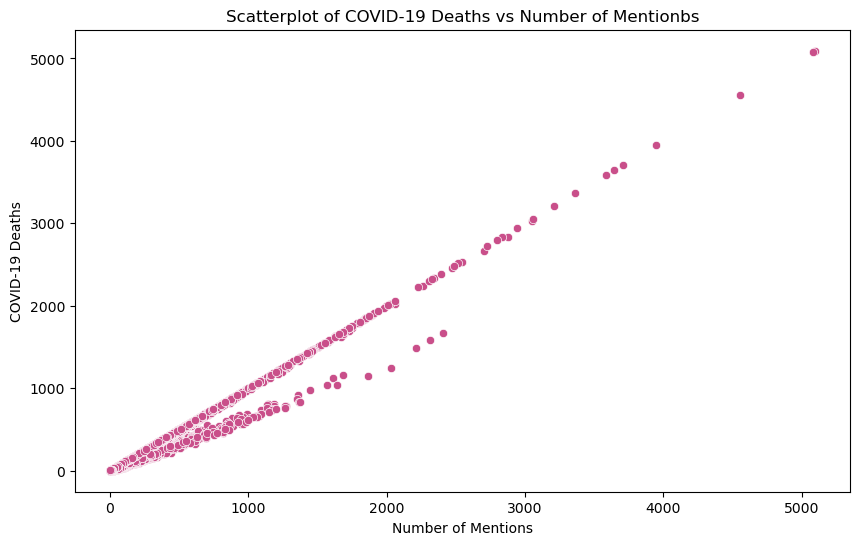

In [13]:
# Scatterplot visulize the realtionship between Number of Mentions and COVID-19 Deaths
plt.figure(figsize=(10,6))
sns.scatterplot(data = df_cov_19_numeric, x = 'Number of Mentions', y = 'COVID-19 Deaths' , color = '#c94f8a')
plt.title('Scatterplot of COVID-19 Deaths vs Number of Mentionbs')
plt.xlabel('Number of Mentions')
plt.ylabel('COVID-19 Deaths')
plt.show()

# 5. State Hypothesis

### Hypothesis: If the number of mentions of a condition on death certificates is higher, then the COVID-19 death count will be significantly higher.

# 6. Reshape Variables into NumPy Arrays

## X = The independent variable
## Y = The dependent variable
###  "Number od Mentions" is the predictor (independent variable) and
### "COVID-19" is the response (dependent variable)

In [14]:
# Define the in dependent variable(x) and deppendent variable(y)
X = df_cov_19_numeric['Number of Mentions'].values.reshape(-1, 1)
y = df_cov_19_numeric['COVID-19 Deaths'].values

# 7. Split the Data into Training and Test Sets

In [15]:
# 70% training sets and 30% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18)

In [16]:
# verify the shape of the training sets and test sets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (301392, 1)
X_test shape: (129168, 1)
y_train shape: (301392,)
y_test shape: (129168,)


# 8. Run a Linear Regression on the Data

### Run a linear regression on the data by first fitting the model to the training set and then creating a prediction for y on the test set.

In [17]:
# Initialize the linear regression model
regression = LinearRegression()

In [18]:
# Fit the model to the training data
regression.fit(X_train, y_train)

LinearRegression()

In [19]:
# Predict on the test data
y_pred = regression.predict(X_test)

# 9. Visualize the Results

### Create a plot that shows the regression line on the test set.

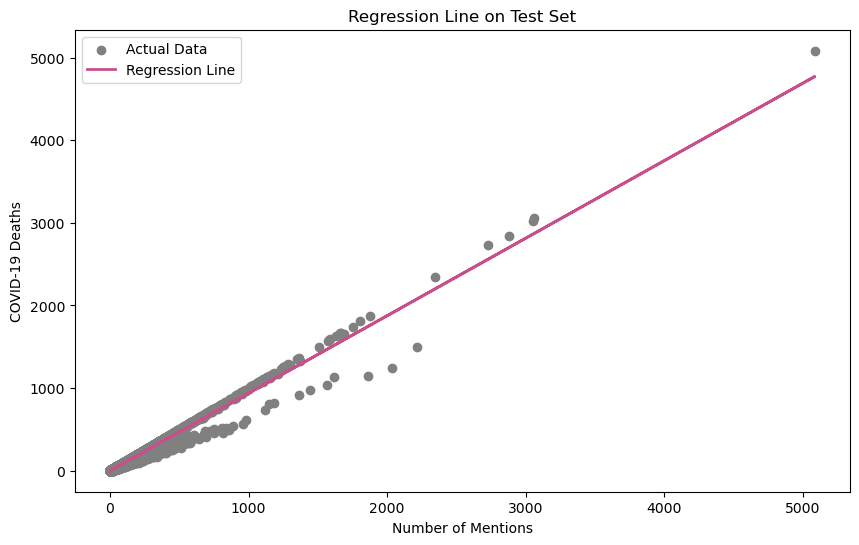

In [35]:
# Plot actual vs predicted values to visualize model performance
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color = 'grey', label = 'Actual Data')
plt.plot(X_test, y_pred, color = '#c94f8a', linewidth = 2, label = 'Regression Line')
plt.title('Regression Line on Test Set')
plt.xlabel('Number of Mentions')
plt.ylabel('COVID-19 Deaths')
plt.legend()

# Export to the 'Visualizations' folder
file_name = os.path.join(path, '04 Analysis', 'Visualizations', 'regression_line_test_set.png')
plt.savefig(file_name)
plt.show()

# 10. Interpretation of the Results

### The scatterplot and regression line visulaization show a clear positive relationship between the "Number of Mentions" of a condition on death certificates and "COVID-19 Deaths".

### The regression line closely follows the data points, indicating a strong fit.

# 11. Check Model Performance Statistics

In [21]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 66.70086640534167
R2 Score: 0.9752164023222347


# 12. Comapre the Predicted y Values with the Actual y Values in a Dataframe

In [22]:
# Create a dataframe to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicated': y_pred})

In [23]:
# Check the results
comparison_df.head(30)

,Actual,Predicated
0,0,-0.132279
1,55,53.353977
2,0,-0.132279
3,0,-0.132279
4,0,-0.132279
5,0,-0.132279
6,0,-0.132279
7,0,-0.132279
8,0,-0.132279
9,0,-0.132279


In [24]:
comparison_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129168 entries, 0 to 129167
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Actual      129168 non-null  int64  
 1   Predicated  129168 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 2.0 MB


In [25]:
comparison_df.shape

(129168, 2)

# 13. Thoughts on How Well the Model Performed

### The relatively low MSE of 66.70 suggests that the model's predictions are close to the actual values.

### A high R-squared score of 0.975 indicates that approximately 97.5% of the variance in "COVID-19 Deaths" can be explained by the "Number of Mentions" of conditions.

### Overall the statistics indicate that this linear regression model is effective in predicting "COVID-19 Deaths" based on the "Number of Mentions".

# 14. Additional Analysis - Top 5 Conditions

### Perform additional linear regression analyses focused on the top 5 conditions identified in the previous exercises:
Influenza and pneumonia

Vascular and unspecified dementia

Ischemic heart disease

Diabetes

Renal failure

In [26]:
# Filter the dataset to include only the selected conditions
top_conditions = ['Influenza and pneumonia', 'Vascular and unspecified dementia', 'Ischemic heart disease', 'Diabetes', 'Renal failure']
df_top_conditions = df_cov_19[df_cov_19['Condition'].isin(top_conditions)]

In [27]:
# Check the results of filtering
unique_conditions = df_top_conditions['Condition'].unique()
unique_conditions

array(['Influenza and pneumonia', 'Ischemic heart disease', 'Diabetes',
       'Vascular and unspecified dementia', 'Renal failure'], dtype=object)

Influenza and pneumonia - Mean Squared Error: 7.273443755007848
Influenza and pneumonia - R2 Score: 0.9994598998299048


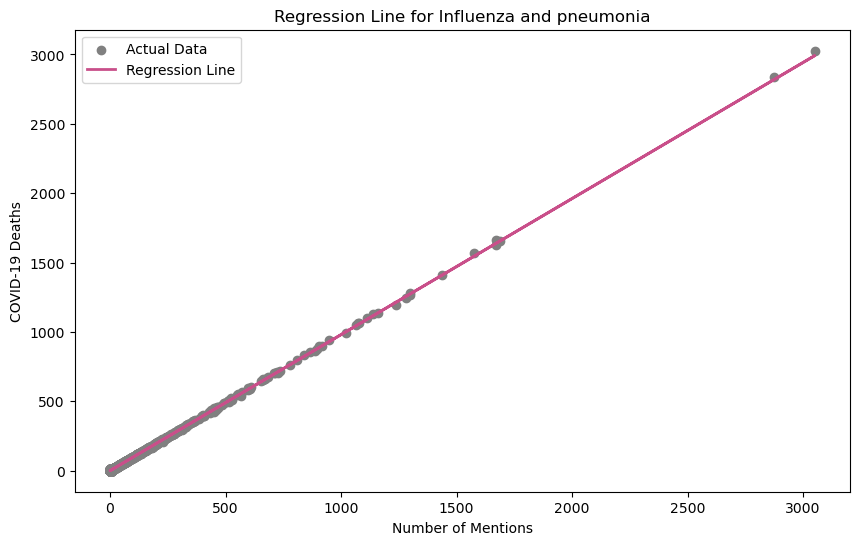

Vascular and unspecified dementia - Mean Squared Error: 2.9036822538900977
Vascular and unspecified dementia - R2 Score: 0.9948614994653373


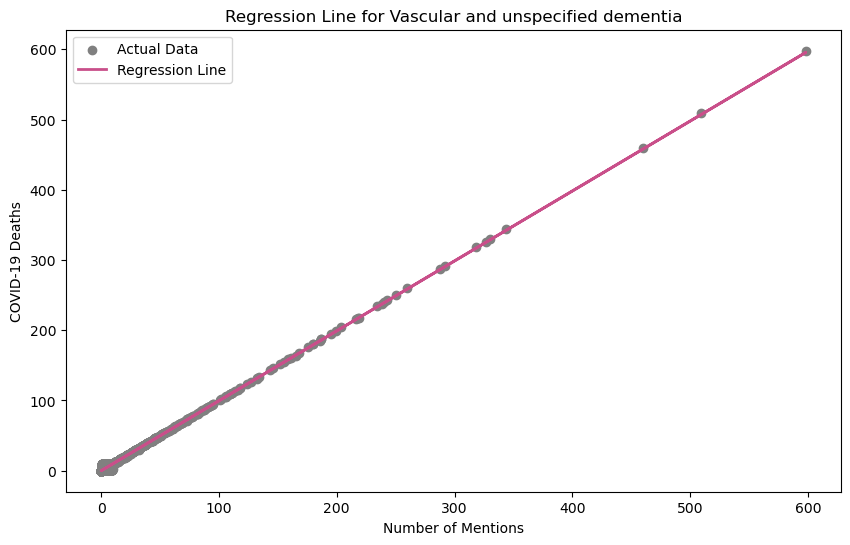

Ischemic heart disease - Mean Squared Error: 5.281934387168661
Ischemic heart disease - R2 Score: 0.9919764029784619


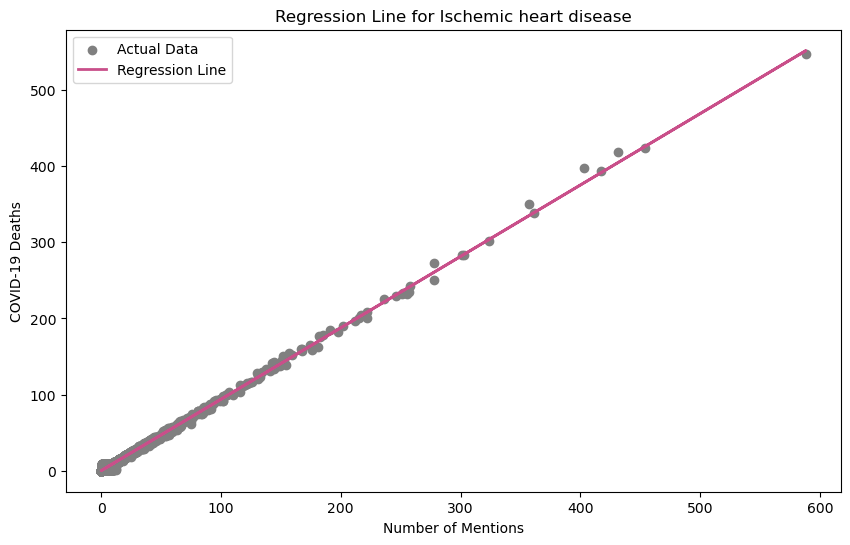

Diabetes - Mean Squared Error: 5.163126056269849
Diabetes - R2 Score: 0.9968683250646432


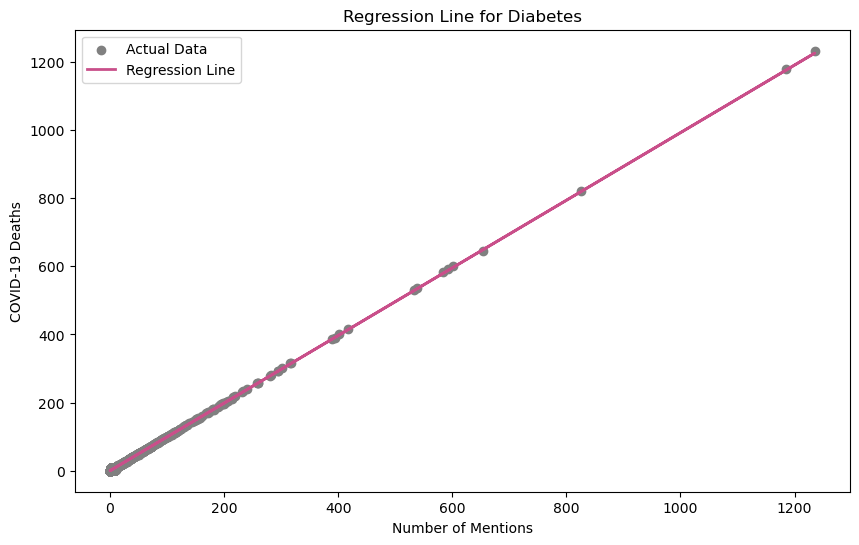

Renal failure - Mean Squared Error: 5.4551388461388495
Renal failure - R2 Score: 0.9920119848283431


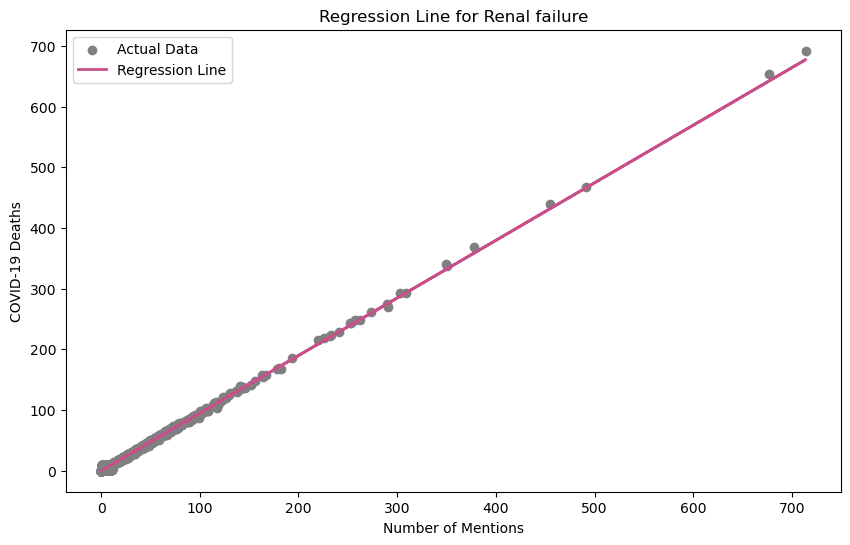

In [36]:
# Run the regression analysis for each of the specified conditons using a for loop
for condition in top_conditions:
    df_condition = df_top_conditions[df_top_conditions['Condition'] == condition]
    
    # Define the independent variable (x) and the dependent variable (y)
    X_condition = df_condition['Number of Mentions'].values.reshape(-1, 1)
    y_condition = df_condition['COVID-19 Deaths'].values
    
    # Split the data 70% training sets and 30% test sets
    X_train_cond, X_test_cond, y_train_cond, y_test_cond = train_test_split(X_condition, y_condition, test_size=0.3, random_state=18)
    
    # Initialize the linear regression model
    regression_cond = LinearRegression()
    
    # Fit the model to the training data
    regression_cond.fit(X_train_cond, y_train_cond)
    
    # Predict on the test data
    y_pred_cond = regression_cond.predict(X_test_cond)
    
    # Visualize the results
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test_cond, y_test_cond, color='grey', label='Actual Data')
    plt.plot(X_test_cond, y_pred_cond, color='#c94f8a', linewidth=2, label='Regression Line')
    plt.title(f'Regression Line for {condition}')
    plt.xlabel('Number of Mentions')
    plt.ylabel('COVID-19 Deaths')
    plt.legend()
    
    # Check the performance statistics
    mse_cond = mean_squared_error(y_test_cond, y_pred_cond)
    r2_cond = r2_score(y_test_cond, y_pred_cond)
    print(f'{condition} - Mean Squared Error: {mse_cond}')
    print(f'{condition} - R2 Score: {r2_cond}')
    
    # Export the plots to the "Visualizations" folder
    file_name = os.path.join(path, '04 Analysis', 'Visualizations', f'regression_line_{condition.replace(" ", "_").lower()}.png')
    plt.savefig(file_name)
    plt.show()

# 15. Final Interpretation of the Results

### The additional analysis focused on the top 5 conditions provides further insights into the relationship between specific conditions and COVID-19 Deaths:

Influenza and pneumonia: MSE = 7.27, R2 = 0.999

Vascular and unspecified dementia: MSE = 2.90, R2 = 0.995

Ischemic heart disease: MSE = 5.28, R2 = 0.992

Diabetes: MSE = 5.16, R2 = 0.997

Renal failure: MSE = 5.46, R2 = 0.992

### The results show that the model performs exceptionally well across these specific conditions, with lower MSEs and higher R-squared values than the model of all conditions.

### These results reinforce the conslusion that the "Number of Mentions" of these specific conditions is a very strong predictor of "COVID-19 Deaths".